# Tensorflow 1.10

# Pre-Installation
* python 3.6.5
* pip -> for python3 version
* virtualenv
* virtualenvwrapper (optional)
* Anaconda (optioanl)
* Tensorflow (python, pip, virtualenv)
* PyCharm (idea)

Für python, pip und virtualenv Installation

https://www.digitalocean.com/community/tutorials/how-to-install-python-3-and-set-up-a-programming-environment-on-ubuntu-18-04-quickstart

Für virtualenvwrapper Installation

https://medium.com/@aaditya.chhabra/virtualenv-with-virtualenvwrapper-on-ubuntu-34850ab9e76


PyCharm Installation

https://linuxize.com/post/how-to-install-pycharm-on-ubuntu-18-04/


# Install Tensorflow
### for CPU

pip install tensorflow
### for GPU (Treiber benötigt)

pip install tensorflow-gpu
### Update Tensorflow

pip uninstall tensorflow
pip install tensorflow





# Getting started

#### Hauputkomponente von Tensorflow:
* **Graph** represent units of computation (Job)
* **Session** Session object encapsulates the environment in which Operation objects are executed (context manager in Python)
* **Tensor** represent the units of data that flow between operations
* **Operation** is a node in a TensorFlow Graph that takes zero or more Tensor objects as input, and produces zero or more Tensor objects as output. Objects of type Operation are created by calling a Python op constructor
![title](img/graph.png)


#### Methode, die häufig benutzt sind
* **feed** avoid evaluating the index-th output of operation by substituting t for the value it produces
* **fetch** return the output of one or more operations

## Hands-on

### Graph
Create a Graph and start it

In [2]:
import tensorflow as tf

In [2]:
# Create a constant
# |3, 3|
# |    |
m1 = tf.constant([[3, 3]])
print(m1)

Tensor("Const:0", shape=(1, 2), dtype=int32)


In [3]:
# |2|
# |3|
m2 = tf.constant([[2], [3]])
print(m2)

Tensor("Const_1:0", shape=(2, 1), dtype=int32)


In [4]:
product = tf.matmul(m1, m2)
print(product)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


In [5]:
# define a new session
sess = tf.Session()
# call run() method to perform multiplication
# run() triggers three operations:
# m1, m2 and product
res = sess.run(product)
print(res)
sess.close()

[[15]]


In [6]:
# start session with context manager
with tf.Session() as sess:
    res = sess.run(product)
    print(res, type(res), res.shape)

[[15]] <class 'numpy.ndarray'> (1, 1)


### Variable
define two functions for substract and add

In [1]:
x = tf.Variable([1,2])
a = tf.constant([3,3])
# add substract op
sub = tf.subtract(x,a)
# add addition op
add = tf.add(x,a)

# init variable
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)  # perform init op
    print(sess.run(sub))
    print(sess.run(add))

NameError: name 'tf' is not defined

In [8]:
# initialize a new variable state with name counter
state = tf.Variable(0, name="counter")
# define a new op, which take state and plus 1
new_value = tf.add(state, 1)
# parse variables
update = tf.assign(state, new_value)
# init
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))

0
1
2
3
4
5


### Fetch and Feed

In [9]:
# fetch can perform more operations in one step
input1 = tf.constant(3.0)
input2 = tf.constant(4.0)
input3 = tf.constant(5.0)

add = tf.add(input1, input2)
mul = tf.multiply(input3, add)

In [10]:
with tf.Session() as sess:
    res = sess.run([add, mul])
    print(res)

[7.0, 35.0]


TensorFlow feed_dict example: Use feed_dict to feed values to TensorFlow placeholders

In [11]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)

with tf.Session() as sess:
    res = sess.run(output,feed_dict={input1:[8.], input2: [3.]})
    print(res)

[24.]


In [12]:
import numpy as np

In [13]:
x_data = np.random.rand(100)
print(x_data)

[0.4656315  0.93166999 0.38344783 0.9089493  0.60896439 0.57709158
 0.07504301 0.34049399 0.84360243 0.3585016  0.92110455 0.03356237
 0.01025465 0.25039103 0.82857165 0.61451941 0.28028897 0.32293381
 0.14544626 0.28049088 0.43871426 0.99657637 0.67717964 0.68934449
 0.23816001 0.68443079 0.83368814 0.81630873 0.91021111 0.99263609
 0.19697985 0.18322794 0.79396033 0.13702357 0.71271754 0.34472868
 0.7040315  0.85546597 0.25065047 0.90986668 0.98688953 0.62347381
 0.45282154 0.39324064 0.31330179 0.8086144  0.83291088 0.45057766
 0.06416067 0.98144557 0.53252691 0.48256626 0.13280993 0.79154265
 0.56820068 0.27099603 0.91750911 0.54274731 0.76494628 0.27001021
 0.76020138 0.48129047 0.81376485 0.17217469 0.73246482 0.1043374
 0.71898399 0.30861994 0.08785917 0.08840491 0.5846052  0.9465361
 0.63985128 0.43117238 0.17252416 0.70088588 0.53232989 0.44662916
 0.40286081 0.15195211 0.45725718 0.50644689 0.66945761 0.92044946
 0.99792709 0.55567441 0.80369384 0.00498315 0.20966416 0.657716

### Hello World in ML

In [14]:
# generate random data between 0 and 1
x_data = np.random.rand(100)
y_data = x_data * 0.1 + 0.2

# create a linear model
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k * x_data + b 

# define loss function
loss = tf.reduce_mean(tf.square(y_data - y))

# define optimizer
optimizer = tf.train.GradientDescentOptimizer(0.2)

# minimiz loss function
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(200):
        sess.run(train)
        if step%20 == 0:
            print("step: ", step, " k and b: ", sess.run([k, b]))
    

step:  0  k and b:  [0.05326972, 0.10007931]
step:  20  k and b:  [0.10317349, 0.1983056]
step:  40  k and b:  [0.101955935, 0.19895574]
step:  60  k and b:  [0.101205476, 0.1993564]
step:  80  k and b:  [0.10074297, 0.19960333]
step:  100  k and b:  [0.100457914, 0.19975553]
step:  120  k and b:  [0.10028221, 0.19984934]
step:  140  k and b:  [0.10017394, 0.19990714]
step:  160  k and b:  [0.1001072, 0.19994277]
step:  180  k and b:  [0.10006608, 0.19996472]


### Ersetz x_data und y_data durch Körper Größe und Gewicht

**key words:** numpy, loss function, gradient decent (optimizer), how machine learning works...

In [5]:
import numpy as np

height = np.array([1.60, 1.62, 1.68, 1.69, 1.70, 1.70, 1.71, 1.72, 1.80, 1.76, 1.77, 1.78, 1.77, 1.78, 1.79, 1.80, 1.81, 1.82, 1.83, 1.94])
weight = np.array([60.5, 58.8, 62.7, 62.8, 63.1, 58.9, 61.5, 65.8, 70.0, 65.8, 66.8, 68.0, 66.7, 60.8, 72.4, 70.5, 72.8, 75.8, 74.6, 83.2])


# create a linear model
b = tf.Variable(0.)
k = tf.Variable(0.)
weight_head = k * height + b 

# define loss function
loss = tf.reduce_mean(tf.square(weight - weight_head))

# define optimizer
optimizer = tf.train.GradientDescentOptimizer(0.1)

# minimiz loss function
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(501):
        sess.run(train)
        if step%20 == 0:
            print("step: ", step, " k and b: ", sess.run([k, b]))
      
    saver.save(sess, "./model_folder/model.ckpt")
    print("model is saved!")
    saver.restore(sess, "./model_folder/model.ckpt")
    sess.run([k,b])
    print(k, b)
    

step:  0  k and b:  [23.60778, 13.415]
step:  20  k and b:  [29.18473, 16.009094]
step:  40  k and b:  [29.433538, 15.572192]
step:  60  k and b:  [29.680943, 15.137755]
step:  80  k and b:  [29.926947, 14.705772]
step:  100  k and b:  [30.171566, 14.276227]
step:  120  k and b:  [30.414803, 13.849107]
step:  140  k and b:  [30.656664, 13.424401]
step:  160  k and b:  [30.897161, 13.0020895]
step:  180  k and b:  [31.136301, 12.582165]
step:  200  k and b:  [31.374092, 12.16461]
step:  220  k and b:  [31.61054, 11.749411]
step:  240  k and b:  [31.845654, 11.336556]
step:  260  k and b:  [32.079437, 10.926033]
step:  280  k and b:  [32.3119, 10.517829]
step:  300  k and b:  [32.543056, 10.111927]
step:  320  k and b:  [32.772903, 9.708317]
step:  340  k and b:  [33.001453, 9.306984]
step:  360  k and b:  [33.228714, 8.90792]
step:  380  k and b:  [33.454693, 8.511106]
step:  400  k and b:  [33.67939, 8.116538]
step:  420  k and b:  [33.902824, 7.724196]
step:  440  k and b:  [34.124996

### Virutalization

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

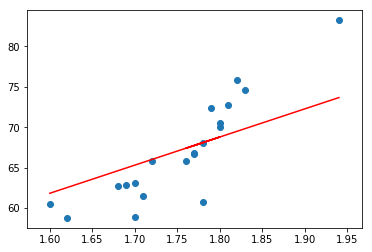

In [17]:
height = np.array([1.60, 1.62, 1.68, 1.69, 1.70, 1.70, 1.71, 1.72, 1.80, 1.76, 1.77, 1.78, 1.77, 1.78, 1.79, 1.80, 1.81, 1.82, 1.83, 1.94])
weight = np.array([60.5, 58.8, 62.7, 62.8, 63.1, 58.9, 61.5, 65.8, 70.0, 65.8, 66.8, 68.0, 66.7, 60.8, 72.4, 70.5, 72.8, 75.8, 74.6, 83.2])

weight_predict = 34.78401 * height + 6.1768394
plt.scatter(height, weight)
plt.plot(height, weight_predict, 'r')

In [36]:

with tf.Session() as sess:
    
    # Restore variables from disk.
    model = saver.restore(sess, "./model_folder/model.ckpt.data-00000-of-00001")
    model

    

INFO:tensorflow:Restoring parameters from ./model_folder/model.ckpt.data-00000-of-00001


DataLossError: Unable to open table file ./model_folder/model.ckpt.data-00000-of-00001: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1440, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2705, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2809, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2869, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-4d6a4c533031>", line 23, in <module>
    saver = tf.train.Saver()
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1281, in __init__
    self.build()
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1293, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1330, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 778, in _build_internal
    restore_sequentially, reshape)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 397, in _AddRestoreOps
    restore_sequentially)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 829, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1463, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/home/bai/.virtualenvs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

DataLossError (see above for traceback): Unable to open table file ./model_folder/model.ckpt.data-00000-of-00001: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
